In [1]:
import os

def delete_directory_contents(directory):
    # List all files and directories in the specified directory
    for item in os.listdir(directory):
        # Construct the full path of each item
        item_path = os.path.join(directory, item)
        # Check if the item is a file
        if os.path.isfile(item_path):
            # If it's a file, delete it
            os.remove(item_path)
        # If the item is a directory, recursively call delete_directory_contents
        elif os.path.isdir(item_path):
            delete_directory_contents(item_path)
            # After deleting all contents, remove the directory itself
            os.rmdir(item_path)

# Specify the directory whose contents you want to delete
directory_path = '/kaggle/working'

# Call the function to delete the contents of the directory
delete_directory_contents(directory_path)

print("Contents of the directory have been deleted successfully.")

Contents of the directory have been deleted successfully.


In [2]:
import pandas as pd

# data = pd.read_csv("/kaggle/input/air-quality-data-in-india/city_day.csv")
data = pd.read_csv("/kaggle/input/city-data-api-extracted/combined_file.csv")
# feature_columns = ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
data.head()

,City,CO,NO2,O3,PM10,PM25,Datetime,AQI
0,Delhi,403.5,62.5,6.5,438.0,70.0,2024-04-19:18,318
1,Delhi,1683.0,249.0,2.5,432.0,432.0,2024-04-19:17,432
2,Delhi,2046.0,203.0,3.0,432.0,432.0,2024-04-19:16,432
3,Delhi,2046.0,203.0,3.0,432.0,432.0,2024-04-19:15,432
4,Delhi,373.0,109.0,3.6,1103.0,725.0,2024-04-19:14,500


In [3]:
feature_columns = ['PM25', 'PM10', 'O3', 'AQI', 'CO', 'NO2']
data = data[feature_columns]
data.head()

,PM25,PM10,O3,AQI,CO,NO2
0,70.0,438.0,6.5,318,403.5,62.5
1,432.0,432.0,2.5,432,1683.0,249.0
2,432.0,432.0,3.0,432,2046.0,203.0
3,432.0,432.0,3.0,432,2046.0,203.0
4,725.0,1103.0,3.6,500,373.0,109.0


In [4]:
data.isnull().sum()

PM25    0
PM10    0
O3      0
AQI     0
CO      0
NO2     0
dtype: int64

In [5]:
data['PM10'].isnull().sum()

0

In [6]:
data.shape

(24395, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24395 entries, 0 to 24394
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    24395 non-null  float64
 1   PM10    24395 non-null  float64
 2   O3      24395 non-null  float64
 3   AQI     24395 non-null  int64  
 4   CO      24395 non-null  float64
 5   NO2     24395 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


In [8]:
data.shape

(24395, 6)

In [9]:
data.dropna(axis=0, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24395 entries, 0 to 24394
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    24395 non-null  float64
 1   PM10    24395 non-null  float64
 2   O3      24395 non-null  float64
 3   AQI     24395 non-null  int64  
 4   CO      24395 non-null  float64
 5   NO2     24395 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


In [11]:
data.head(5)

,PM25,PM10,O3,AQI,CO,NO2
0,70.0,438.0,6.5,318,403.5,62.5
1,432.0,432.0,2.5,432,1683.0,249.0
2,432.0,432.0,3.0,432,2046.0,203.0
3,432.0,432.0,3.0,432,2046.0,203.0
4,725.0,1103.0,3.6,500,373.0,109.0


In [12]:
data.shape

(24395, 6)

In [13]:
# import plotly.express as px

# data['Date'] = pd.to_datetime(data['Date'])

# fig1 = px.line(data, x='Date', y='AQI', color='City', title='AQI Trend Over Time')
# fig1.show()

# # Box plot for AQI distribution by City
# fig2 = px.box(data, x='City', y='AQI', title='AQI Distribution by City')
# fig2.update_layout(xaxis={'categoryorder':'total descending'})
# fig2.show()

# # Scatter plot matrix for selected features
# selected_features = ['PM2.5', 'NO2', 'CO', 'O3', 'AQI']
# fig3 = px.scatter_matrix(data[selected_features], title='Scatter Plot Matrix')
# fig3.show()

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
# feature_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

In [16]:
# Splitting the dataset into features (X) and target (y)
selected_columns = ['PM25', 'PM10', 'O3', 'CO', 'NO2']
X = data[selected_columns]
y = data['AQI']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# Defining and compiling the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [19]:
# Training the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)


Epoch 1/200
488/488 [==============================] - 3s 3ms/step - loss: 8162.3760 - val_loss: 1388.0286
Epoch 2/200
488/488 [==============================] - 1s 3ms/step - loss: 1242.3953 - val_loss: 960.4451
Epoch 3/200
488/488 [==============================] - 1s 3ms/step - loss: 1019.7134 - val_loss: 846.1743
Epoch 4/200
488/488 [==============================] - 1s 3ms/step - loss: 909.8337 - val_loss: 760.0663
Epoch 5/200
488/488 [==============================] - 1s 3ms/step - loss: 811.2525 - val_loss: 691.5345
Epoch 6/200
488/488 [==============================] - 1s 3ms/step - loss: 700.4974 - val_loss: 548.3997
Epoch 7/200
488/488 [==============================] - 1s 3ms/step - loss: 598.1928 - val_loss: 455.2028
Epoch 8/200
488/488 [==============================] - 1s 3ms/step - loss: 505.9312 - val_loss: 390.1808
Epoch 9/200
488/488 [==============================] - 1s 3ms/step - loss: 446.0978 - val_loss: 339.6151
Epoch 10/200
488/488 [=============================

In [20]:
# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Data:", loss)

153/153 [==============================] - 0s 2ms/step - loss: 111.1671
Mean Squared Error on Test Data: 111.16705322265625


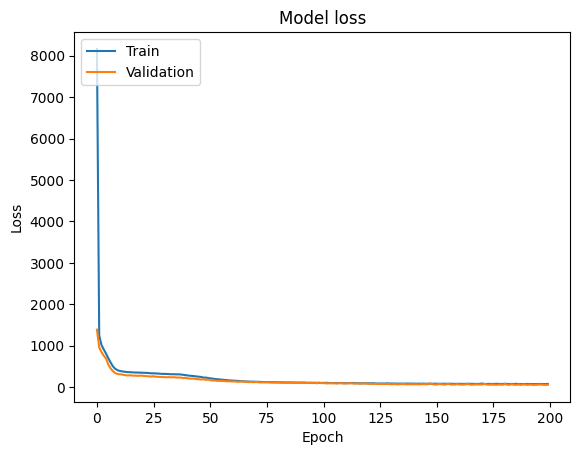

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [22]:
model.save('/kaggle/working/aqi_pred_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
# user_input = pd.DataFrame({
#     'PM2.5': [127],
#     'PM10': [46],
#     'O3': [15]
# })
# # ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
# # ['PM2.5', 'PM10', 'O3']
# user_input_scaled = scaler.transform(user_input)

# user_pred = model.predict(user_input_scaled)

# print(f"Predicted AQI: {user_pred[0][0]}")
# 1/1 [==============================] - 0s 22ms/step
# Predicted AQI: 219.50479125976562

In [24]:
user_input = pd.DataFrame({
    'PM25': [26],
    'PM10': [590],
    'O3': [17],
    'CO': [439],
    'NO2': [10]
})
# ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
# ['PM2.5', 'PM10', 'O3']
user_input_scaled = scaler.transform(user_input)

user_pred = model.predict(user_input_scaled)

print(f"Predicted AQI: {user_pred[0][0]}")

1/1 [==============================] - 0s 84ms/step
Predicted AQI: 485.7232360839844


In [26]:
import joblib

In [27]:
joblib.dump(scaler, '/kaggle/working/scaler.pkl')

['/kaggle/working/scaler.pkl']

In [28]:
imported_scaler = joblib.load('/kaggle/working/scaler.pkl')

In [29]:
user_input = pd.DataFrame({
    'PM25': [26],
    'PM10': [590],
    'O3': [17],
    'CO': [439],
    'NO2': [10]
})
# ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
# ['PM2.5', 'PM10', 'O3']
user_input_scaled = imported_scaler.transform(user_input)

user_pred = model.predict(user_input_scaled)

print(f"Predicted AQI: {user_pred[0][0]}")

1/1 [==============================] - 0s 19ms/step
Predicted AQI: 485.7232360839844
